In [1]:
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'
import sys
import os

folder = '../../../../crispy'
print(folder)
if folder not in sys.path: sys.path.append(folder)

from crispy.params import Params
folder = '../../../crispy'

from crispy.tools.initLogger import getLogger
log = getLogger('crispy')
from crispy.IFS import propagateIFS
from crispy.IFS import reduceIFSMap
from crispy.tools.postprocessing import process_SPC_IFS,SNR_spectrum
from crispy.tools.imgtools import scale2imgs,bowtie
from crispy.unitTests import testCreateFlatfield

#os.chdir(folder)
par = Params(folder)
par.saveRotatedInput = False
par.saveDetector = False


Populating the interactive namespace from numpy and matplotlib
../../../../crispy


In [2]:
par.savePoly=True
par.saveRotatedInput=True
testCreateFlatfield(par,useQE=True)


crispy - INFO - Reduced cube will have 44 wavelength bins
crispy - INFO - The number of input pixels per lenslet is 4.285714
crispy - INFO - Using PSFlet gaussian approximation
crispy - WARNING - Assuming endpoints wavelist is given
[ 700.          703.18181818  706.36363636  709.54545455  712.72727273
  715.90909091  719.09090909  722.27272727  725.45454545  728.63636364
  731.81818182  735.          738.18181818  741.36363636  744.54545455
  747.72727273  750.90909091  754.09090909  757.27272727  760.45454545
  763.63636364  766.81818182  770.          773.18181818  776.36363636
  779.54545455  782.72727273  785.90909091  789.09090909  792.27272727
  795.45454545  798.63636364  801.81818182  805.          808.18181818
  811.36363636  814.54545455  817.72727273  820.90909091  824.09090909
  827.27272727  830.45454545  833.63636364  836.81818182  840.        ]
crispy - INFO - Writing data to ./SimResults/imagePlaneRot.fits
crispy - INFO - Writing data to ./SimResults/detectorFramepoly.

### reduce flatfield

In [2]:
reduceIFSMap(par,par.unitTestsOutputs+'/flatfield.fits')

crispy - INFO - Read data from HDU 1 of ./unitTestsOutputs/flatfield.fits
crispy - INFO - Reduced cube will have 19 wavelength bins
crispy - INFO - Writing data to ./SimResults/flatfield_red_optext.fits
crispy - INFO - Elapsed time: 1.588393s


<crispy.tools.image.Image instance at 0x11347df80>

In [2]:
par.nonoise=True
os5folder = '/Users/mrizzo/IFS/OS5/with_lowfc'
offaxispsf= '/Users/mrizzo/IFS/OS5/offaxis/spc_offaxis_psf.fits'
signal,noise,noiseleft = process_SPC_IFS(par,os5folder,offaxispsf,
                outdir_time_series = '/Users/mrizzo/IFS/OS5/',outdir_detector='/Users/mrizzo/IFS/OS5/OS5_detector',
                outdir_average='/Users/mrizzo/IFS/OS5/OS5_average',
                pp_fact=1.00,
                t_zodi=0.00,
                subtract_ref_psf=False,
                process_cubes=False,
                process_offaxis=False,
                process_detector=True,
                take_averages=True,
                parallel=False)
np.savetxt(par.exportDir+"/signal.txt",signal)
np.savetxt(par.exportDir+"/noise.txt",noise)
np.savetxt(par.exportDir+"/noiseleft.txt",noiseleft)

crispy - INFO - Read data from HDU 0 of /Users/mrizzo/IFS/OS5/with_lowfc/os5_spc_001.fits
crispy - INFO - The number of input pixels per lenslet is 4.285714
crispy - INFO - Using PSFlet gaussian approximation
crispy - WARNING - Assuming slices are evenly spread in wavelengths
crispy - INFO - Done.
crispy - INFO - Performance: 4 seconds total
crispy - INFO - Writing data to /Users/mrizzo/IFS/OS5/OS5_average/zodicube.fits
crispy - INFO - Apply detector readout on os5_spc_001_refstar_IFS.fits
crispy - INFO - Read data from HDU 1 of /Users/mrizzo/IFS/OS5//os5_spc_001_refstar_IFS.fits
crispy - INFO - Writing data to /Users/mrizzo/IFS/OS5/OS5_detector/os5_spc_001_refstar_IFS_detector.fits
crispy - INFO - Apply detector readout on os5_spc_002_refstar_IFS.fits
crispy - INFO - Read data from HDU 1 of /Users/mrizzo/IFS/OS5//os5_spc_002_refstar_IFS.fits
crispy - INFO - Writing data to /Users/mrizzo/IFS/OS5/OS5_detector/os5_spc_002_refstar_IFS_detector.fits
crispy - INFO - Apply detector readout o

crispy - INFO - Reduced cube will have 19 wavelength bins


3.3784598409324174

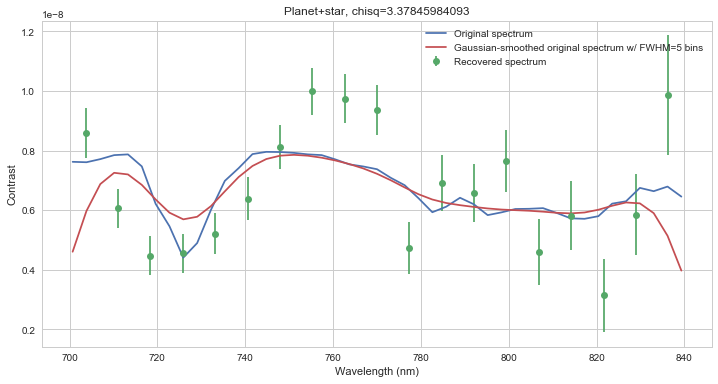

In [7]:
from crispy.tools.reduction import calculateWaveList
signal = np.loadtxt(par.exportDir+"/signal.txt")
noise = np.loadtxt(par.exportDir+"/noise.txt")
lam_midpts,junk = calculateWaveList(par)
wavelist = 770*np.linspace(1.-0.18/2.,1.+0.18/2.,45)
SNR_spectrum(lam_midpts,signal,noise,lam_contrast=wavelist,outfolder=par.exportDir+"/",FWHM=2.*44./19.)



In [ ]:
from astropy.io import fits
test = fits.open('/local/data/nicolaus2/mrizzo/crispy/crispy/OS5/os5_spc_031_targetstar_IFS.fits')[1].data
print(np.sum(test))

In [2]:
from crispy.tools.inputScene import adjust_krist_header
from crispy.tools.image import Image
offaxispsf= '/Users/mrizzo/IFS/OS5/offaxis/spc_offaxis_psf.fits'
cube = Image(offaxispsf)
cube.header
adjust_krist_header(cube,lamc=770.)
cube.header

crispy - INFO - Read data from HDU 0 of /Users/mrizzo/IFS/OS5/offaxis/spc_offaxis_psf.fits


SIMPLE  =                    T / Written by IDL:  Tue Feb 21 14:04:33 2017      
BITPIX  =                  -64 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                  256 /Number of positions along axis 1                
NAXIS2  =                  256 /Number of positions along axis 2                
NAXIS3  =                   45 /Number of positions along axis 3                
DATE    = '2017-02-17'         / Creation UTC (CCCC-MM-DD) date of FITS header  
NLAM    =                   45 / Number of wavelengths                          
LAM_C   =                 0.77 / Passband central wavelength in microns         
LAM_MIN =               0.7007 / Minimum passband wavelength                    
LAM_MAX =               0.8393 / Maximum passband wavelength                    
PIXSIZE =             0.100000 / sampling in lam_c/D radians                    
OFFSET  =              7.000

## Test least-square normalization of cube

In [5]:
from crispy.tools.image import Image
img2 = Image(par.exportDir+"/average_ref_star_detector_red_optext.fits")
img1 = Image(par.exportDir+"/average_target_star_detector_red_optext.fits")
ydim,xdim = img1.data[0].shape
mask,junk = bowtie(img1.data[0],ydim//2,xdim//2,openingAngle=65,
            clocking=-par.philens*180./np.pi,IWApix=4*0.77/0.6,OWApix=22*0.77/0.6,
            export=None,twomasks=False)
coefs,diff = scale2imgs(img1,img2,mask=mask,returndiff = True)
Image(data=diff).write(par.exportDir+"/test_lstsqdiff.fits")
print(coefs)

crispy - INFO - Read data from HDU 1 of ../../../crispy/SimResults/average_ref_star_detector_red_optext.fits
crispy - INFO - Read inverse variance from HDU 2 of ../../../crispy/SimResults/average_ref_star_detector_red_optext.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/SimResults/average_target_star_detector_red_optext.fits
crispy - INFO - Read inverse variance from HDU 2 of ../../../crispy/SimResults/average_target_star_detector_red_optext.fits
crispy - INFO - Writing data to ../../../crispy/SimResults/test_lstsqdiff.fits
[ 2.47455549  2.40709305  2.36078191  2.35570002  2.33201098  2.3061471
  2.28811955  2.27054119  2.25113821  2.23329282  2.22033453  2.20893788
  2.19611454  2.18169451  2.16517687  2.1457243   2.12097192  2.09435081
  2.0794127 ]


In [11]:
from crispy.tools.rotate import Rotate,Shift
#test = Rotate(diff,par.philens,clip=False)
outcube = [Rotate(diff[i],-par.philens,True,order=1) for i in range(diff.shape[0])]
Image(data=np.array(outcube)).write(par.exportDir+"/test_rotate_cube.fits")


crispy - INFO - Writing data to ../../../crispy/SimResults/test_rotate_cube.fits
